In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as sgt
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [3]:
raw_csv_data = pd.read_csv('013 IndexE8.csv')
df_comp = raw_csv_data.copy()
#Converting Time
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
#Setting Date as an index
df_comp.set_index('date', inplace=True)
#Setting Frequency as business working days
df_comp = df_comp.asfreq('b')
#Filling the Missing or Empty Values
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.ftse

In [5]:
df_comp['returns'] = df_comp.market_value.pct_change(1)*100

<AxesSubplot:xlabel='date'>

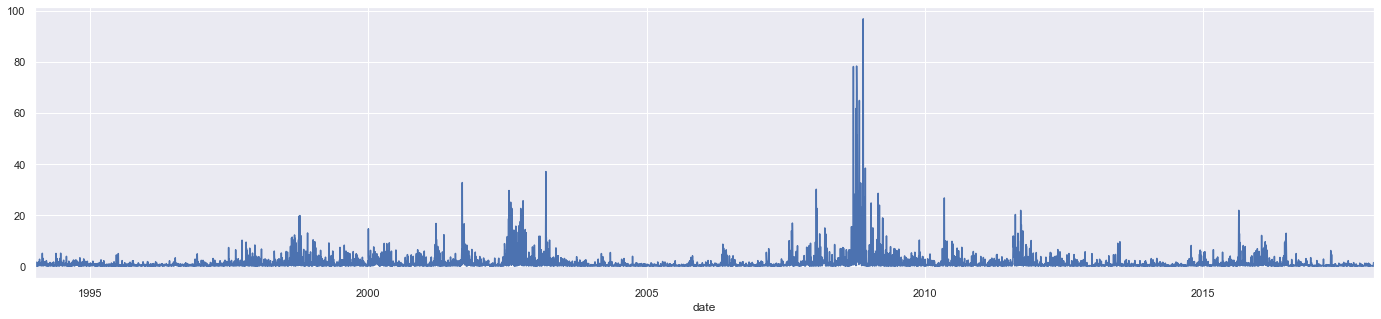

In [7]:
df_comp['squared'] = df_comp['returns'].mul(df_comp['returns'])
df_comp['squared'].plot(figsize = (24,5))

In [9]:
#ARCH Model
from arch import arch_model
model_arch_ret_1 = arch_model(df_comp.returns, mean = 'constant', vol = 'ARCH', p = 1)
results_arch_ret_1 = model_arch_ret_1.fit(update_freq = 5)
results_arch_ret_1.summary()

Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 9
            Gradient evaluations: 2


C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\arch\univariate\base.py:708: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                    nan
Distribution:                  Normal   AIC:                               nan
Method:            Maximum Likelihood   BIC:                               nan
                                        No. Observations:                 6277
Date:                Sat, Apr 03 2021   Df Residuals:                     6276
Time:                        19:24:00   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu                nan        nan        nan        nan [    nan,    nan]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega             nan        nan        nan        nan [    nan,    nan]
alpha[1]       0.1000        nan        nan        nan [    nan,    nan]
========================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Inequality constraints incompatible.
See convergence_flag.

"""